In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    """
    Implementación de un perceptrón simple.

    Atributos:
        weights (ndarray): Pesos del perceptrón, incluyendo el bias.
        lr (float): Tasa de aprendizaje.
        epochs (int): Número de iteraciones para el entrenamiento.
    """
    
    def __init__(self, num_inputs: int, lr: float, epochs: int, pesos=None):
        """
        Inicializa el perceptrón.

        Args:
            num_inputs (int): Número de entradas.
            lr (float): Tasa de aprendizaje.
            epochs (int): Número de iteraciones para el entrenamiento.
            pesos (ndarray, optional): Pesos iniciales del perceptrón. 
                Si se proporciona, se utilizarán estos pesos.
        """
        if pesos is not None:
            self.weights = pesos  # Cargar pesos predefinidos
        else:
            self.weights = np.random.rand(num_inputs + 1)  # Peso extra para el bias
            
        self.lr = lr  # Tasa de aprendizaje
        self.epochs = epochs  # Número de iteraciones

    def act_fn(self, x: np.ndarray, funcion: str = 'step') -> np.ndarray:
        """Calcula la función de activación."""
        if funcion == 'step':    
            return np.where(x > 0, 1, 0)
        elif funcion == 'sigmoid':
            return 1 / (1 + np.exp(-x)) 
        elif funcion == 'relu':
            return np.where(x > 0, x, 0)
        elif funcion == 'tanh':
            return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
        else:
            raise ValueError("Función de activación no soportada.")

    def predict(self, inputs: np.ndarray) -> int:
        """Realiza una predicción basada en las entradas."""
        return self.act_fn(np.dot(inputs, self.weights[1:]) + self.weights[0])

    def compute_cost(self, in_train: np.ndarray, clases: np.ndarray) -> float:
        """Calcula el costo total (error cuadrático medio)."""
        predicciones = self.predict(in_train)
        error = clases - predicciones
        return np.mean(error ** 2)

    def train(self, in_train: np.ndarray, clases: np.ndarray, verbose: bool = False):
        """Entrena el perceptrón con las entradas y las clases."""
        errores = []
        for _ in range(self.epochs):
            e = 0
            for entrada, clase in zip(in_train, clases):
                prediccion = self.predict(entrada)
                error = clase - prediccion
                self.weights[0] += self.lr * error
                self.weights[1:] += self.lr * error * entrada
                
                e += np.abs(error)
            errores.append(e)
            
            # Calcular y almacenar el costo al final de cada época
            costo = self.compute_cost(in_train, clases)
            print(f"Época {_ + 1}: Costo = {costo}")

        if verbose:
            plt.figure()
            plt.plot(errores)
            plt.title('Errores durante el entrenamiento')
            plt.xlabel('Epochs')
            plt.ylabel('Error')
            plt.show()

    def get_weights(self) -> np.ndarray:
        """Recupera los pesos del perceptrón."""
        return self.weights

    def plot_decision_boundary(self, in_train: np.ndarray, clases: np.ndarray):
        """Plotea las entradas y la frontera de decisión del perceptrón."""
        # Definir el rango para el gráfico
        x_min, x_max = in_train[:, 0].min() - 1, in_train[:, 0].max() + 1
        y_min, y_max = in_train[:, 1].min() - 1, in_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                             np.linspace(y_min, y_max, 100))

        # Realizar predicciones para cada punto del meshgrid
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Crear el gráfico
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
        plt.scatter(in_train[:, 0], in_train[:, 1], c=clases, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
        plt.xlabel('Entrada 1')
        plt.ylabel('Entrada 2')
        plt.title('Frontera de decisión del Perceptrón')
        plt.show()


La **primer tarea** que le asignaremos al perceptrón es que aprenda a comportarse como una compuerta lógica AND. Esto implica que la neurona deberá ser capaz de producir una salida de 1 únicamente cuando ambas entradas sean 1; en todos los demás casos, la salida deberá ser 0. Puesto en términos de la tabla de verdad:

| $x_1$  | $x_2$  |   $y$|
| ------ |:------:| -:|
| 0      | 0      | 0 |
| 0      | 1      | 0 |
| 1      | 0      | 0 |
| 1      | 1      | 1 |

Implementamos matriz de entradas *x* y vector de salidas *y*. Además, instanciamos clase perceptron en un objeto llamado "ia_and".


In [3]:
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])
ia_and = Perceptron(num_inputs=2, lr=0.2, epochs=10)
print(x, y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]] [0 0 0 1]


Inspeccionemos un poquito *ia_and*. Veamos: 
* Funciones de activación
* Pesos iniciales (aleatorios)
* Prediccón previa entrenamiento

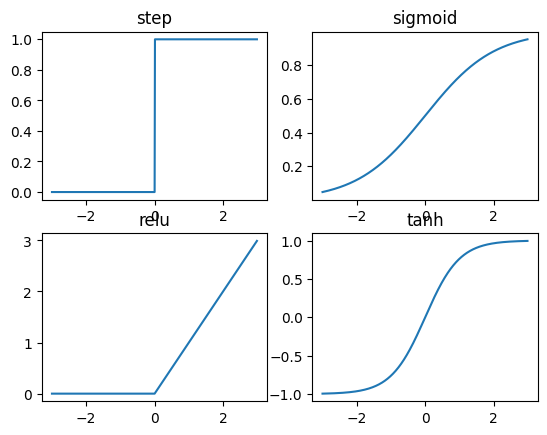

Pesos:  [0.79254899 0.29009667 0.32104448]
Predicciones sin entrenamiento:
Entradas: [0 0]  Correcto: 0  Predicción: 1
Entradas: [0 1]  Correcto: 0  Predicción: 1
Entradas: [1 0]  Correcto: 0  Predicción: 1
Entradas: [1 1]  Correcto: 1  Predicción: 1


In [4]:
t = np.arange(-3, 3, 0.01) #creamos un vector de -1 a 1

#evaluamos y graficamos este vector con las distintas funciones de activación para ver su comportamiento
plt.figure()
plt.subplot(221), plt.plot(t, ia_and.act_fn(t, 'step')), plt.title('step')
plt.subplot(222), plt.plot(t, ia_and.act_fn(t, 'sigmoid')), plt.title('sigmoid')
plt.subplot(223), plt.plot(t, ia_and.act_fn(t, 'relu')), plt.title('relu')
plt.subplot(224), plt.plot(t, ia_and.act_fn(t, 'tanh')), plt.title('tanh')
plt.show()

print("Pesos: ", ia_and.get_weights())
print("Predicciones sin entrenamiento:")
for entradas, label in zip(x, y):
  prediccion = ia_and.predict(entradas)
  print('Entradas:', entradas, ' Correcto:', label, ' Predicción:', prediccion)

Entrenemos la neurona (con *verbose*) y volvemos a correr predicción:

Época 1: Costo = 0.75
Época 2: Costo = 0.5
Época 3: Costo = 0.25
Época 4: Costo = 0.5
Época 5: Costo = 0.0
Época 6: Costo = 0.0
Época 7: Costo = 0.0
Época 8: Costo = 0.0
Época 9: Costo = 0.0
Época 10: Costo = 0.0


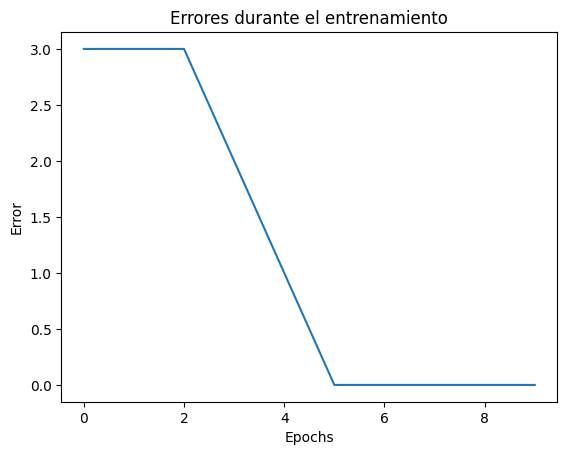

Entradas: [0 0]  Correcto: 0  Predicción: 0
Entradas: [0 1]  Correcto: 0  Predicción: 0
Entradas: [1 0]  Correcto: 0  Predicción: 0
Entradas: [1 1]  Correcto: 1  Predicción: 1


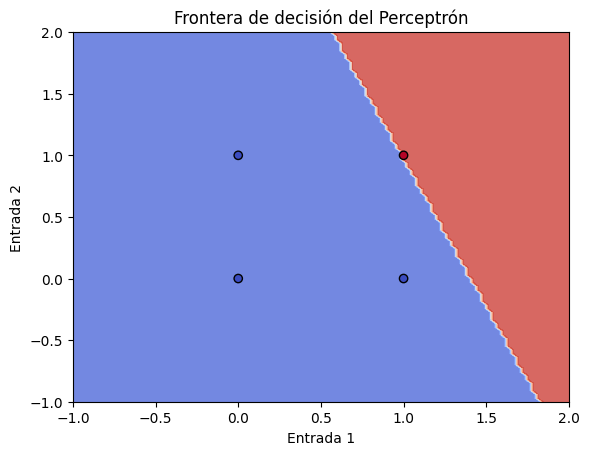

In [5]:
ia_and.train(x, y, True)
for entradas, label in zip(x, y):
  prediccion = ia_and.predict(entradas)
  print('Entradas:', entradas, ' Correcto:', label, ' Predicción:', prediccion)
ia_and.plot_decision_boundary(x,y)

Se puede ver la convergencia de la función de costo. Además, se nota que las predicciones ahora son correctas. Finalmente, los pesos de la neurona quedan:

In [6]:
print("Bias: {}, W1: {}, W2: {}".format(*ia_and.get_weights()))

Bias: -0.4074510057470431, W1: 0.2900966666591439, W2: 0.12104448190211409
